### AudioSignalProcessing
- Примеры извлечения фич из аудио сигнала (mfcc и пр.)
- Примеры сетей разного типа (CNN, RNN, перцептрон и пр.) для распознования аудио сигнала на тестовых данных
- Подготовить модель распознавания ключевых фраз + other

In [1]:
from os.path import join, isdir, isfile
import os
import shutil
from tqdm.auto import tqdm
import librosa
import json
import matplotlib.pyplot as plt
import numpy as np
from scipy.io import wavfile
import soundcard as sc
import python_speech_features
import tensorflow as tf
from sklearn.model_selection import train_test_split
from importlib import reload

import audio_signal_processing as asp

In [9]:
reload(asp)

<module 'audio_signal_processing' from 'C:\\Users\\balob\\Documents\\AudioSignalProcessing\\audio_signal_processing.py'>

### Подготовка данных и сохранение в файл

In [2]:
# Используются записи ключевых слов длительностью 1 секунда,
# сложенные в дирректории, названные в соответствии со словами, содержащимися в них.

# На выходе получаем следующие данные:
# {
#     'mapping':['five', 'no', 'yes',...],
#     'labels':[0,0,0,... 1,1,1,... 2,2,2,...],
#     'MFCCs':[no_of_sample, time_steps, mfcc_koefficient],
#     'files':['.\\VoiceSamples\\YesNoFive10Samples\\five\\004ae714_nohash_0.wav',...]
# }

#######################################################################################
# Define variables here
#######################################################################################

downloads = r'.\VoiceSamples'
voice_samples_folder = r'OnOffUpDownStopOthers250Samples' # YesNoFive10Samples, OnOffUpDownStopOthers250Samples, DummySamples

input_voice_samples_folders = join(downloads, voice_samples_folder)

output_voice_features_json = join(input_voice_samples_folders, "data.json")
output_trained_model = join(input_voice_samples_folders, "model.h5")

sample_length = 22050 # 1 sec. of audio

#######################################################################################

#######################################################################################

asp.preprocess_dataset(input_voice_samples_folders, output_voice_features_json, sample_length=sample_length)

print('\nCompleted')

# На основе:
# The Sound of AI, Deep Learning (Audio) Application: From Design to Deployment, Preparing the Speech Dataset,
# https://www.youtube.com/watch?v=VPJ2jazh_KI&list=PL-wATfeyAMNpCRQkKgtOZU_ykXc63oyzp&index=2
# GitHub с кодом:
# https://github.com/musikalkemist/Deep-Learning-Audio-Application-From-Design-to-Deployment/tree/master/2-%20Preparing%20the%20Dataset


Processing: 'down'




Processing: 'off'




Processing: 'on'




Processing: 'others'




Processing: 'stop'




Processing: 'up'




Completed


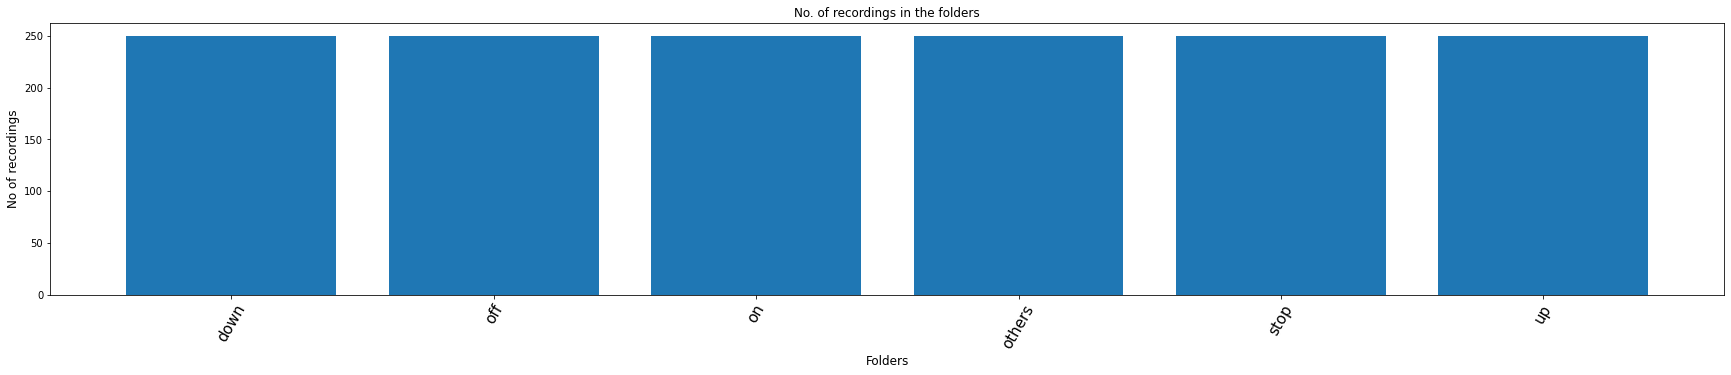

In [3]:
# Проверить кол-во аудиосэмплов каждой фразы

# Folder names with audio samples
labels = [folder for folder in os.listdir(input_voice_samples_folders) 
          if isdir(join(input_voice_samples_folders, folder))]

# Find count of each label and plot bar graph
no_of_recordings=[]
for label in labels:
    waves = [file for file in os.listdir(join(input_voice_samples_folders, label)) if file.endswith('.wav')]
    no_of_recordings.append(len(waves))
    
# Plot
plt.figure(figsize=(30,5))
index = np.arange(len(labels))
plt.bar(index, no_of_recordings)
plt.xlabel('Folders', fontsize=12)
plt.ylabel('No of recordings', fontsize=12)
plt.xticks(index, labels, fontsize=15, rotation=60)
plt.title('No. of recordings in the folders')
plt.show()

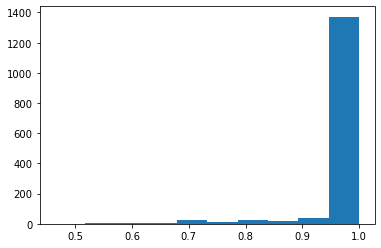

In [4]:
# Проверить длительность сэмплов (в секундах)

duration_of_recordings=[]

for label in labels:
    waves = [file for file in os.listdir(join(input_voice_samples_folders, label)) if file.endswith('.wav')]
    for wav in waves:
        sample_rate, samples = wavfile.read(join(input_voice_samples_folders, label, wav))
        duration_of_recordings.append(float(len(samples)/sample_rate))  
plt.hist(np.array(duration_of_recordings))

plt.show()

### Извлечение фич из аудио сигнала

In [5]:
#######################################################################################
# Define variables here
#######################################################################################

sample_file_path = join(downloads, 'SimpleSamples/bird.wav')

#######################################################################################

#######################################################################################

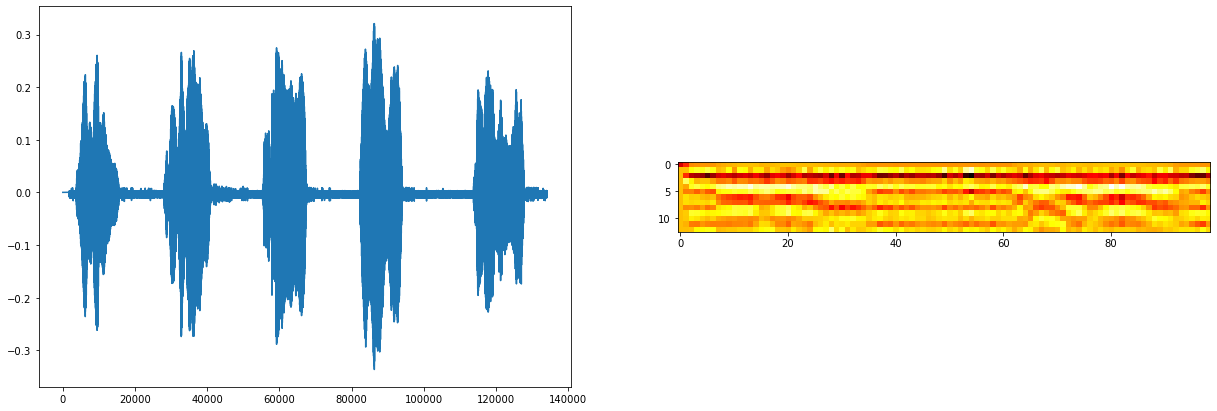

(13, 99)

In [6]:
# Извлечение mfcc с использованием python_speech_features

signal, rate = librosa.load(sample_file_path, sr=44100)

mfcc = python_speech_features.mfcc(signal[:rate], rate, numcep=13, nfilt=13, nfft=1103).T

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(21, 7))
axes[0].plot(signal)
axes[1].imshow(mfcc, cmap='hot', interpolation='nearest')
plt.show()

mfcc.shape # (13, 44)

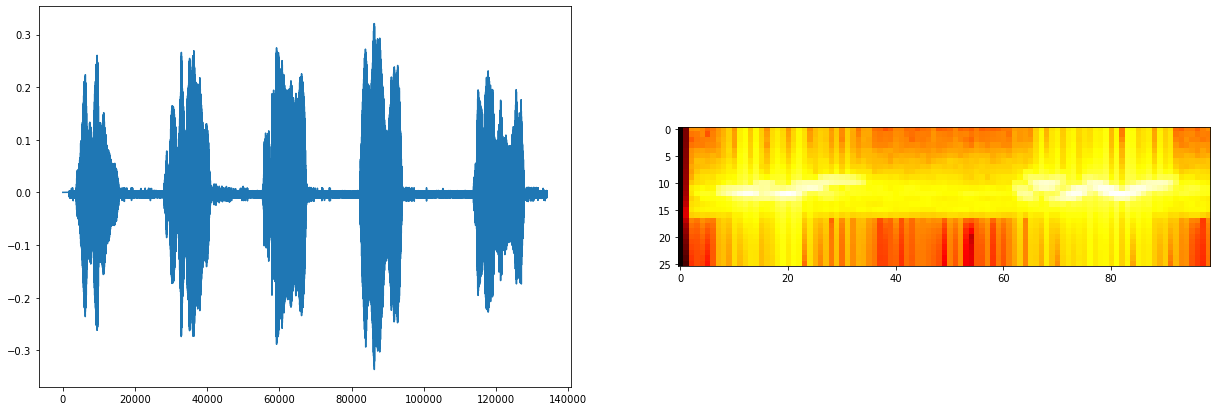

(26, 99)

In [7]:
# Извлечение logfbank с использованием python_speech_features

signal, rate = librosa.load(sample_file_path, sr=44100)

logfbank = python_speech_features.logfbank(signal[:rate], rate, nfilt=26, nfft=1103).T

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(21, 7))
axes[0].plot(signal)
axes[1].imshow(logfbank, cmap='hot', interpolation='nearest')
plt.show()

logfbank.shape # (13, 44)

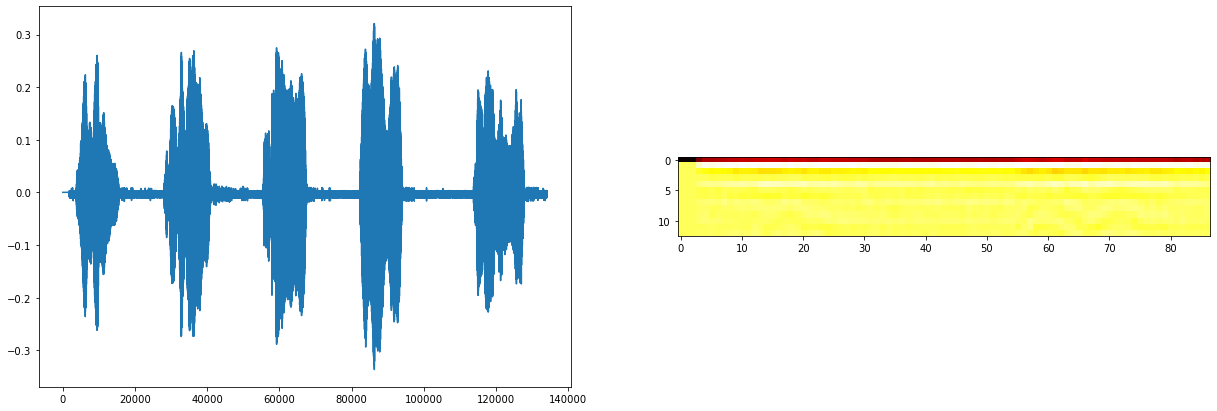

(13, 87)

In [8]:
# Извлечение mfcc в nm.array из wav файла с использованием librosa (ИСПОЛЬЗОВАТЬ)

signal, rate = librosa.load(sample_file_path, sr=44100)

# extract MFCCs
mfcc = librosa.feature.mfcc(signal[:rate], sr=rate, n_mfcc=13, n_fft=1103, hop_length=512)

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(21, 7))
axes[0].plot(signal)
axes[1].imshow(mfcc, cmap='hot', interpolation='nearest')
plt.show()

mfcc.shape

### Пример применения CNN

In [18]:
# Загрузка данных и подготовка переменных

X_real, y_real, mapping = asp.load_data(output_voice_features_json)

#######################################################################################
# Define variables here
#######################################################################################

samples_in_class = 250 # определяется для генерации данных вручную
classes = len(mapping)

EPOCHS = 100
BATCH_SIZE = 32
PATIENCE = 5
LEARNING_RATE = 0.0001

#######################################################################################

#######################################################################################

##### Применение CNN Conv2D на dummy
Пример решения задачи классификации с использованием tensorflow CNN. Данные сгенерированы вручную аналогичные данным голоса mfcc.


    X_train:      (960, 44, 13, 1)
    X_validation: (240, 44, 13, 1)
    X_test:       (300, 44, 13, 1)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 42, 11, 64)        640       
_________________________________________________________________
batch_normalization (BatchNo (None, 42, 11, 64)        256       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 21, 6, 64)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 19, 4, 32)         18464     
_________________________________________________________________
batch_normalization_1 (Batch (None, 19, 4, 32)         128       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 10, 2, 32)         0         
_______________

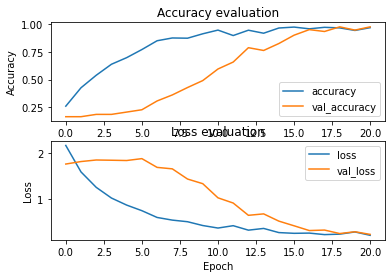

300/300 [==============================] - 0s 183us/sample - loss: 0.2439 - accuracy: 0.9633


In [15]:
# Генерация данных вручную, обучение модели, тестирование и сохранение осученной модели в файл

def main():
    
    # generate dataset
    X, y = asp.gen_feat(classes=classes, samples_in_class=samples_in_class, dim=3)
    
    # generate train, validation and test sets
    X_train, y_train, X_validation, y_validation, X_test, y_test = asp.prepare_dataset(X, y)

    print(f"""
    X_train: {str(X_train.shape):>21}
    X_validation: {str(X_validation.shape):>15}
    X_test: {str(X_test.shape):>22}\n""")
    
    # create network
    input_shape = (X_train.shape[1], X_train.shape[2], 1) # (segments, coeffisients=13, 1)
    model = asp.build_model_conv2d(input_shape, classes, learning_rate=LEARNING_RATE)
    
    # train network
    history = asp.train(model, EPOCHS, BATCH_SIZE, PATIENCE, X_train, y_train, X_validation, y_validation)
    
    # plot accuracy / loss for training/validation set as a function of the epochs
    asp.plot_history(history)
    
    # evaluate network on test set
    test_loss, test_acc = model.evaluate(X_test, y_test)
    
    # save model
    model.save(output_trained_model)

main()

##### Применение CNN Conv2D на реальных данных
Пример решения задачи классификации с использованием tensorflow CNN. Данные сгенерированы вручную аналогичные данным голоса mfcc.


    X_train:      (855, 44, 13, 1)
    X_validation: (214, 44, 13, 1)
    X_test:       (268, 44, 13, 1)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 42, 11, 64)        640       
_________________________________________________________________
batch_normalization_3 (Batch (None, 42, 11, 64)        256       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 21, 6, 64)         0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 19, 4, 32)         18464     
_________________________________________________________________
batch_normalization_4 (Batch (None, 19, 4, 32)         128       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 10, 2, 32)         0         
_____________

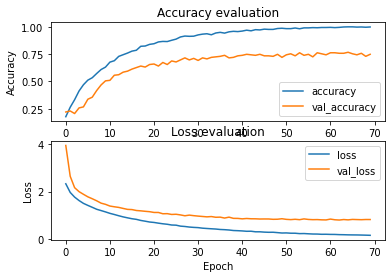

268/268 [==============================] - 0s 190us/sample - loss: 0.8476 - accuracy: 0.7239


In [19]:
# Обучение модели на реальных данных, тестирование и сохранение обученной модели в файл

def main():
    
    # generate train, validation and test sets
    X_train, y_train, X_validation, y_validation, X_test, y_test = asp.prepare_dataset(X_real, y_real)

    print(f"""
    X_train: {str(X_train.shape):>21}
    X_validation: {str(X_validation.shape):>15}
    X_test: {str(X_test.shape):>22}\n""")
    
    # create network
    input_shape = (X_train.shape[1], X_train.shape[2], 1) # (segments, coeffisients=13, 1)
    model = asp.build_model_conv2d(input_shape, classes, learning_rate=LEARNING_RATE)
    
    # train network
    history = asp.train(model, EPOCHS, BATCH_SIZE, PATIENCE, X_train, y_train, X_validation, y_validation)
    
    # plot accuracy/loss for training/validation set as a function of the epochs
    asp.plot_history(history)
    
    # evaluate network on test set
    test_loss, test_acc = model.evaluate(X_test, y_test)
    
    # save model
    model.save(output_trained_model)

main()

##### Проверки

In [16]:
# Загрузка модели и проверка на повторно сгенерированных данных (для сгенерированных вручную данных)

# Поготовить новые данные
X, y = asp.gen_feat(classes=classes, samples_in_class=samples_in_class, dim=3)
X_train, y_train, X_validation, y_validation, X_test, y_test = asp.prepare_dataset(X, y)

# Загрузить модель из файла
model = tf.keras.models.load_model(output_trained_model)
model.summary()

# Протестировать модель на новых данных
test_loss, test_acc = model.evaluate(X_train, y_train)
print(f"\nTest loss: {round(test_loss, 3)}\nTest accuracy: {round(100*test_acc,2)}%")

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 42, 11, 64)        640       
_________________________________________________________________
batch_normalization (BatchNo (None, 42, 11, 64)        256       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 21, 6, 64)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 19, 4, 32)         18464     
_________________________________________________________________
batch_normalization_1 (Batch (None, 19, 4, 32)         128       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 10, 2, 32)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 9, 1, 32)          4

In [17]:
# Тестирование на отдельных данных

index = 11

result = model.predict(X_train)

predicted_result_ind = np.argmax(result[index])
result_ind = y_train[index]

print(f'Predicted: {predicted_result_ind}, Fact: {result_ind}')

Predicted: 5, Fact: 5


##### Предсказания с микрофона

In [42]:
# Предсказание с микрофона (для обученной на реальных данных модели)

samplerate = 22050 # (int) – The desired sampling rate in Hz
sec = 1

numframes = int(samplerate * sec) # (int) – The number of frames to record. Такой же как samplerate, чтобы записать секунду.
default_mic = sc.default_microphone()

# Загрузить модель из файла
model = tf.keras.models.load_model(output_trained_model)

mapping

['five', 'no', 'yes']

In [43]:
print(f'Microphone in use: {default_mic}')
signal = default_mic.record(samplerate = samplerate, numframes = numframes, channels = 1).ravel()

if len(signal) >= sample_length:
    # ensure consistency of the length of the signal
    signal = signal[:sample_length]
    # extract MFCCs
    mfcc = librosa.feature.mfcc(signal, sample_rate, n_mfcc=13, n_fft=2048, hop_length=512)
    # store data for analysed track
    mfcc = mfcc.T[np.newaxis,..., np.newaxis]
    
result = model.predict(mfcc)
predicted_result_ind = np.argmax(result)

print(f'Predicted: {mapping[predicted_result_ind]}')

Microphone in use: <Microphone Микрофон гарнитуры (Plantronics C320-M) (2 channels)>
Predicted: no


### Пример применения MLP
На основе:
- The Sound of AI, 9- How to implement a (simple) neural network with TensorFlow 2, https://www.youtube.com/watch?v=JdXxaZcQer8&list=PL-wATfeyAMNrtbkCNsLcpoAyBBRJZVlnf&index=9


    X_train:           (480, 8000)
    X_validation:     (120, 8000)
    X_test:            (150, 8000)

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_14 (Dense)             (None, 5)                 40005     
_________________________________________________________________
dense_15 (Dense)             (None, 1)                 6         
Total params: 40,011
Trainable params: 40,011
Non-trainable params: 0
_________________________________________________________________
Train on 480 samples, validate on 120 samples
Epoch 1/100
480/480 [==============================] - 0s 618us/sample - loss: 0.8254 - accuracy: 0.3729 - val_loss: 0.7265 - val_accuracy: 0.3333
Epoch 2/100
480/480 [==============================] - 0s 129us/sample - loss: 0.7729 - accuracy: 0.3896 - val_loss: 0.6929 - val_accuracy: 0.3583
Epoch 3/100
480/480 [==============================] - 0s 156us/sa

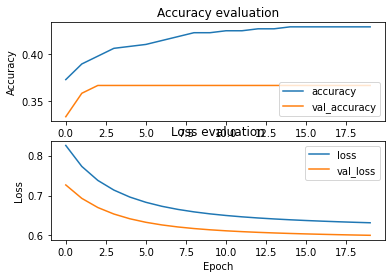

In [48]:
# Генерация данных, обучение модели, тестирование и сохранение обученной модели в файл

def main():
    
    # generate dataset
    X, y = asp.gen_feat(classes=classes, samples_in_class=samples_in_class, dim=1)
    
    # generate train, validation and test sets
    X_train, y_train, X_validation, y_validation, X_test, y_test = asp.prepare_dataset(X, y)

    print(f"""
    X_train: {str(X_train.shape):>21}
    X_validation: {str(X_validation.shape):>15}
    X_test: {str(X_test.shape):>22}\n""")
    
    # create network
    model = asp.build_model_mlp(learning_rate=LEARNING_RATE)
    
    history = asp.train(model, EPOCHS, BATCH_SIZE, PATIENCE, X_train, y_train, X_validation, y_validation)
    
    # evaluate model on test set
    print("\nEvaluation on the test set:")
    model.evaluate(X_test,  y_test, verbose=2)
    
    # plot accuracy/loss for training/validation set as a function of the epochs
    asp.plot_history(history)
    
    # save model
    model.save(output_trained_model)

main()

### Prepare voice samples folder

In [ ]:
# Prepare voice samples folder

downloads = r".\VoiceSamples"
input_voice_samples_folders = join(downloads, 'speech_commands_v0.01')
new_input_voice_samples_folder = 'OnOffUpDownStopOthers250Samples'
num_samples_to_copy = 250
num_samples_to_copy_others = 10

# Read all folders
folders = [folder for folder in os.listdir(input_voice_samples_folders) if isdir(join(input_voice_samples_folders, folder))]

# Select folders for classification and others
class_folders = ['on', 'off', 'up', 'down', 'stop']
other_folders = [folder for folder in folders if not folder in class_folders and not folder.startswith('_')]

# Create new folders for classification + others
os.makedirs(join(downloads, new_input_voice_samples_folder), exist_ok=True, mode=777)
os.makedirs(join(downloads, new_input_voice_samples_folder, 'others'), exist_ok=True, mode=777)
for class_folder in class_folders:
    os.makedirs(join(downloads, new_input_voice_samples_folder, class_folder), exist_ok=True, mode=777)

# Copy files to folders for classification
for class_folder in tqdm(class_folders):
    files = [file for file in os.listdir(join(input_voice_samples_folders, class_folder))
             if isfile(join(input_voice_samples_folders, class_folder, file))]
    for file in files[:num_samples_to_copy]:
        shutil.copy(join(input_voice_samples_folders, class_folder, file),
                    join(downloads, new_input_voice_samples_folder, class_folder))

# Copy files to others for classification
for class_folder in tqdm(other_folders):
    files = [file for file in os.listdir(join(input_voice_samples_folders, class_folder))
             if isfile(join(input_voice_samples_folders, class_folder, file))]
    for file in files[:num_samples_to_copy_others]:
        shutil.copy(join(input_voice_samples_folders, class_folder, file),
                    join(downloads, new_input_voice_samples_folder, 'others', f'{class_folder}_{file}'))

### Материал
- Seth Adams, Deep Learning for Audio Classification, https://www.youtube.com/playlist?list=PLhA3b2k8R3t2Ng1WW_7MiXeh1pfQJQi_P
- Mel Frequency Cepstral Coefficient (MFCC) tutorial, http://www.practicalcryptography.com/miscellaneous/machine-learning/guide-mel-frequency-cepstral-coefficients-mfccs/
- sentdex, Neural Networks from Scratch in Python, https://www.youtube.com/playlist?list=PLQVvvaa0QuDcjD5BAw2DxE6OF2tius3V3
- The Sound of AI, Deep Learning (Audio) Application: From Design to Deployment, https://www.youtube.com/playlist?list=PL-wATfeyAMNpCRQkKgtOZU_ykXc63oyzp <br>**Переработано**: "Deploying the Speech Recognition System with uWSGI"
- The Sound of AI, Deep Learning (for Audio) with Python, https://www.youtube.com/playlist?list=PL-wATfeyAMNrtbkCNsLcpoAyBBRJZVlnf
<br>Done: 9- How to implement a (simple) neural network with TensorFlow 2

##### Датасеты с наборами слов
1. Google AI Blog, Speech Commands Dataset<br>
"The dataset has 65,000 one-second long utterances of 30 short words, by thousands of different people, contributed by members of the public through the AIY website."<br>
https://ai.googleblog.com/2017/08/launching-speech-commands-dataset.html

### Developments